# k-Means Clustering

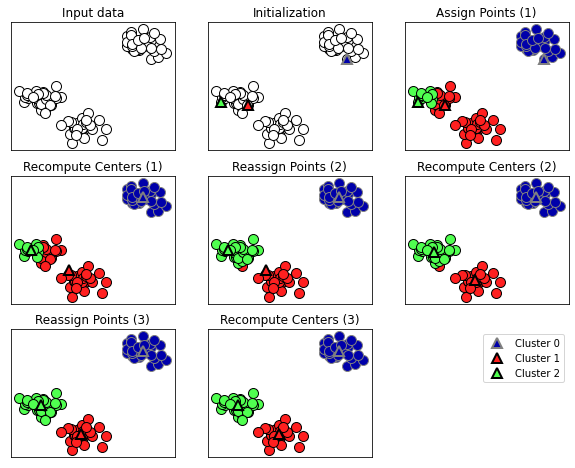

In [1]:
import mglearn
mglearn.plots.plot_kmeans_algorithm()

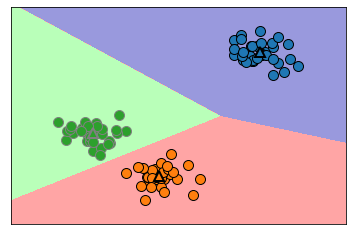

In [2]:
mglearn.plots.plot_kmeans_boundaries()

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X,y = make_blobs(random_state=1)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [4]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


In [5]:
print(kmeans.predict(X))

[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


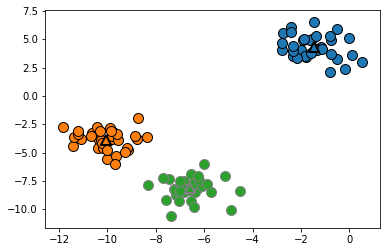

In [6]:
mglearn.discrete_scatter(X[:,0],X[:,1],kmeans.labels_,markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],[0,1,2],markers='^',markeredgewidth=2)

We can also use more or fewer cluster centers

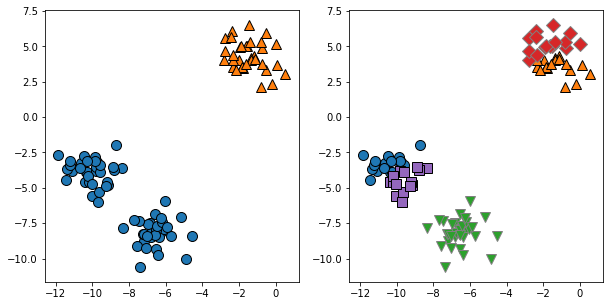

In [7]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2,figsize=(10,5))
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:,0],X[:,1],assignments,ax=axes[0])
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:,0],X[:,1],assignments,ax=axes[1])

# Failure cases of k-means

Even if you know the 'right' number of clusters for a given dataset, k-means might not always be able to recover them. Each cluster is defined solely by its center, which means that each cluster is a convex shape. As a result of this, k-means can only capture relatively simple shapes. k-means also assumes that all clusters have the same 'diameter' in some sense; it always draws the boundary between clusters to be exactly in the middle between the cluster centers. That can sometimes lead to surprising results. 

Text(0, 0.5, 'Feature 1')

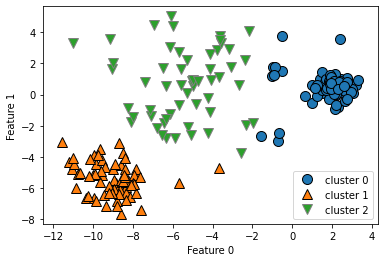

In [8]:
X_varied, y_varied = make_blobs(n_samples=200,
                               cluster_std = [1.0,2.5,0.5],
                               random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:,0],X_varied[:,1],y_pred)
plt.legend(["cluster 0","cluster 1","cluster 2"],loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

k-means also assumes that all directions are equally important for each cluster.

Text(0, 0.5, 'Feature 1')

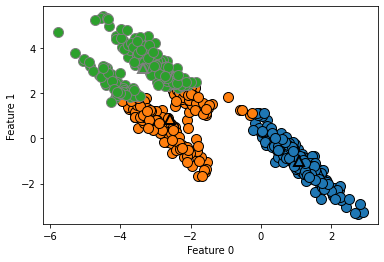

In [9]:
import numpy as np
X,y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)
transformation = rng.normal(size=(2,2))
X = np.dot(X, transformation)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)
mglearn.discrete_scatter(X[:,0],X[:,1],kmeans.labels_,markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],[0,1,2],markers='^',markeredgewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

k-means also performs poorly if the clusters have more complex shapes, like the two_moons data we encountered early

Text(0, 0.5, 'Feature 1')

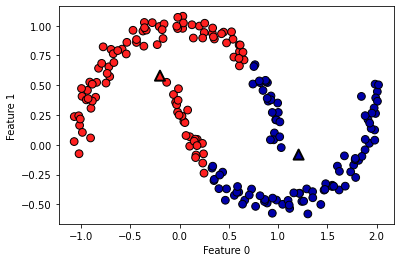

In [10]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=200, noise=0.05,random_state=0)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred,cmap=mglearn.cm2,s=60,edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='^',c=[mglearn.cm2(0),mglearn.cm2(1)],s=100,linewidth=2,edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# Vector quantization, or seeing k-means as decomposition

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF,PCA
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]]=1
X_people = people.data[mask]
y_people = people.target[mask]

<ipython-input-11-beec8acece14>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype=np.bool)


In [12]:
image_shape = people.images[0].shape

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X_people,y_people,stratify=y_people,random_state=0)
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components = 100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters = 100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test),nmf.components_)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\acer\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Text(0, 0.5, 'nmf')

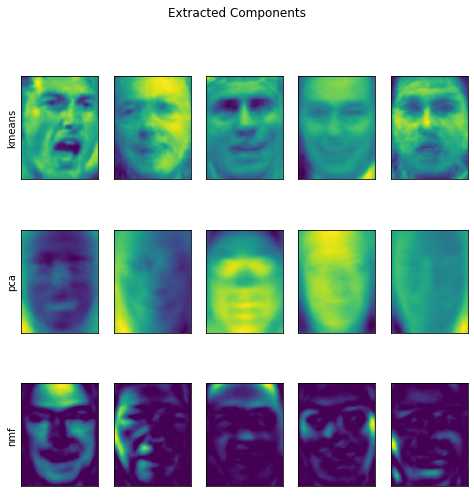

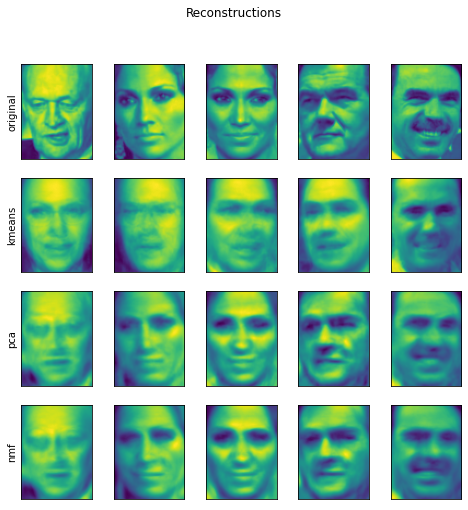

In [14]:
fig, axes = plt.subplots(3,5,figsize=(8,8),subplot_kw={'xticks':(),'yticks':()})
fig.suptitle("Extracted Components")
for ax,comp_kmeans, comp_pca, comp_nmf in zip(axes.T, kmeans.cluster_centers_, pca.components_,nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape))
    ax[2].imshow(comp_nmf.reshape(image_shape))
    
axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4,5, subplot_kw = {'xticks':(),'yticks':()},figsize=(8,8))
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca, X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))
axes[0,0].set_ylabel('original')
axes[1,0].set_ylabel('kmeans')
axes[2,0].set_ylabel('pca')
axes[3,0].set_ylabel('nmf')

Cluster memberships: 
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


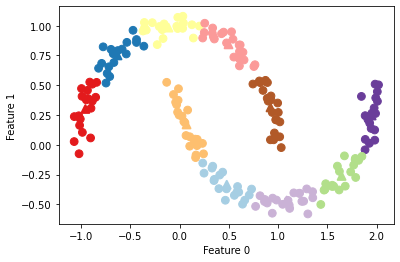

In [15]:
X,y = make_moons(n_samples=200, noise = 0.05, random_state=0)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred,s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=60,marker='^',c=range(kmeans.n_clusters),linewidth=2,cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster memberships: \n{}".format(y_pred))

now we have 10 cluster centers, which means each point is now assigned a number between 0 and 9. We can see this as the data being represented using 10 components(that is, we have 10 new features), with all features being 0, apart from the one that represents the cluster center the point is assigned to. Using this 10-dimensional representation, it would now be possible to separate the two half moon shapes using a linear model, which would not habe been possible using the original two features. It is also possible to get an even more expressive representation of the data by using the distance to each of the cluster center as features. This can be accomplished using the transform method of kmeans.

In [16]:
distance_feature = kmeans.transform(X)
print("Distance feature shape: {}".format(distance_feature.shape))
print("Distance featueres: \n{}".format(distance_feature))

Distance feature shape: (200, 10)
Distance featueres: 
[[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


# Agglomerative Clustering

Agglomerative clustering refers to a collection of clustering algorithms that all build upon the same principles: the algo starts by declaring each point its own cluster, and then merges the two most similar clusters until some stopping criterion is satisfied. The stopping criterion implemented in sklearn is the number of clusters. There are several linking criteria that specify how exactly the "most similar cluster" is measured. This measure is always defined between two exesting clusters.

**ward**
The default choice, ward picks the two clusters to merge such that the varience within all clusters increase the least.This often leads to clusters that are relatively equally sized

**average**
average linkage merges the two clusters that have the smallest average distance between all their points.

**complete**
complete linkage(also known as maximum linkage) merges the two clusters that have the smallest maximum distance between their points.

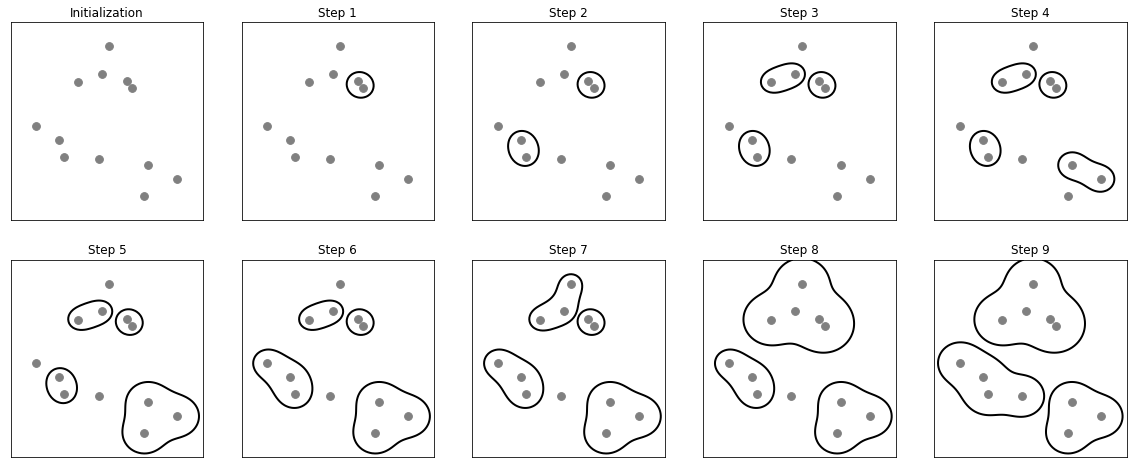

In [17]:
mglearn.plots.plot_agglomerative_algorithm()

Because of the way the algorithm works, agglomerative clustering cannot make predictions for new data points. So, agglomerative clustering has no predict function. To build the model and get the cluster memberships on the training set, use the fit_predict method instead.

Text(0, 0.5, 'Feature 1')

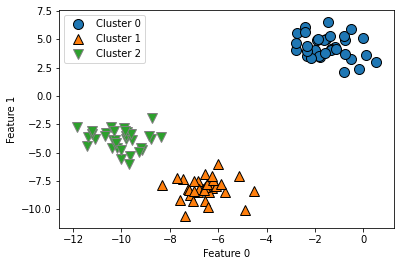

In [18]:
from sklearn.cluster import AgglomerativeClustering
X,y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)
mglearn.discrete_scatter(X[:,0],X[:,1],assignment)
plt.legend(["Cluster 0","Cluster 1","Cluster 2"],loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# Hierarchical clustering and dendograms

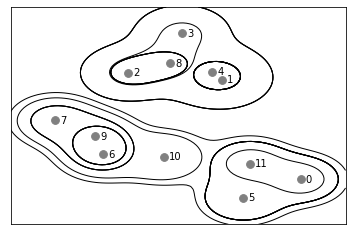

In [19]:
mglearn.plots.plot_agglomerative()

Hierarchical cluster assignment generated with agglomerative clustering, with numbered data points.
These visualizations relies on the two-dimensional nature of the data and therefore cannot be used on datasets that have more than two features. There is, however another tool to visualize hierarchical clustering, called a dendogram, that can handle multidimentional datasets.
# Creating dendrograms using scipy

In [20]:
from scipy.cluster.hierarchy import dendrogram, ward

Text(0, 0.5, 'Cluster distance')

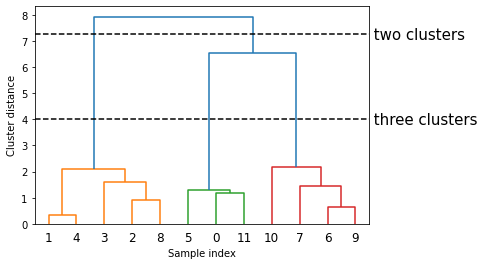

In [21]:
X,y = make_blobs(random_state=0,n_samples=12)
linkage_array = ward(X)
dendrogram(linkage_array)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds,[7.25,7.25],'--',c='k')
ax.plot(bounds,[4,4],'--',c='k')
ax.text(bounds[1],7.25,' two clusters',va='center',fontdict={'size':15})
ax.text(bounds[1],4,' three clusters ',va='center',fontdict={'size':15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

# DBSCAN

density based spatial clustering of applications with noise

The main benefits of DBSCAN are that it does not require the user to set the number of clusters a prior, it can capture clusters of complex shapes, and it can identify points that are not part of any cluster. DBSCAN is somewhat slower than agglomerative clustering and k-means, but still scales to relatively large datasets.

DBSCAN works by identifying points that are in "crowded" regions of the feature space, where many data points are close together. These regions are referred to as dense regions in feature space. The idea behind DBSCAN is that clusters form dense regions of data, separated by regions that are relatively empty.

Points that are within a dense region are called core samples(or core points), and they are defined as follows. There are two parameters in DBSCAN: min_samples and eps. If there are at least min_samples many data points within a distance of eps to a given data point, that data point is classified as a core sample. Core samples that are closer to each other than the distance eps are put into the same cluster by DBSCAN.

The algo works by picking an arbitrary point to start with. It then finds all points with distance eps or less from that point. If there are less than min_samples points within distance eps of the starting point, this point is labeled as noise, meaning that it doesn't belong to any cluster. If there are more than min_samples points within a distance of eps, the point is labeled a core sample and assigned a new cluster label.Then,all neighbors (within eps) of the point are visited. If they have not been assigned a cluster yet, they are assigned the new cluster label that was just created. If they are core samples, their neighbors are visited in turn, and so on. The cluster grows until there are no more core samples within distance eps of the cluster. Then another point that hasn't yet been visited is picked, and the same procedure is repeated.

In the end, there are three kinds of points: core points, points that are within distance eps of core points(boundary points), and noise.

In [22]:
from sklearn.cluster import DBSCAN
X,y = make_blobs(random_state=0,n_samples=12)
dbscan=DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


As you can see, all data points were assigned the label -1, which stands for noise. This is a consequence of the default parameter settings for eps and min_samples, which are not tuned for small datasets.

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


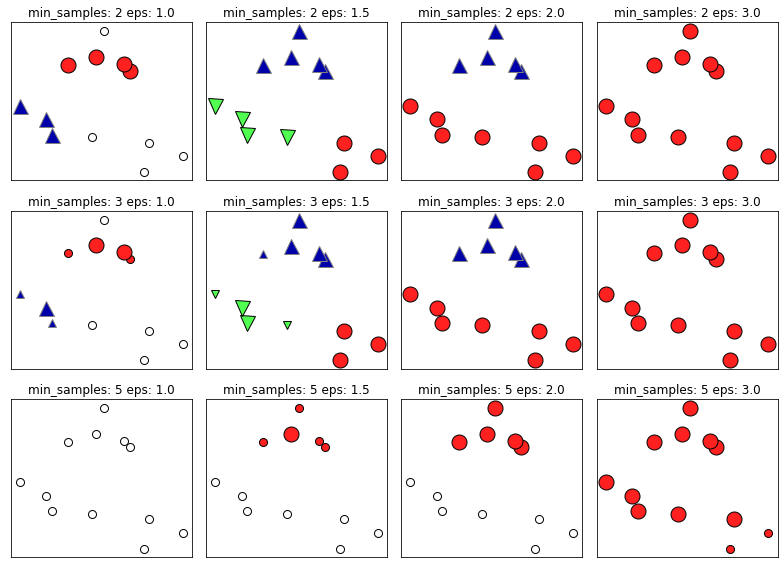

In [23]:
mglearn.plots.plot_dbscan()

while dbscan doesn't require setting of the number of clusters explicityly, setting eps implicitly controls how many clusters will be found. Finding a good setting for eps is sometimes easier after scaling the data using StandardScaler or MinMaxScaler, as using these scaling techniques will ensure that all features have similar ranges.

Text(0, 0.5, 'Feature 1')

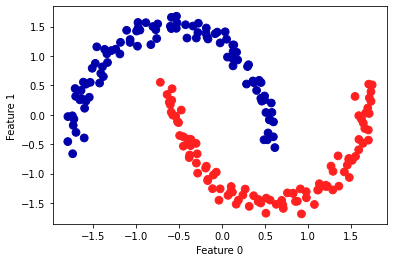

In [24]:
from sklearn.preprocessing import StandardScaler
X,y = make_moons(n_samples=200, noise=0.05, random_state=0)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# Comparing and Evaluating Clustering Algorithms

## evaluating clustering with ground truth

There are metrics that can be used to assess the outcome of a clustering algorithm relative to a ground truth clustering,
the most important ones being the adjusted rand index(ARI) and normalized mutual information(NMI), which both provide a quantitative measure with an optimum of 1 and a value of 0 for unrelated clusterings.


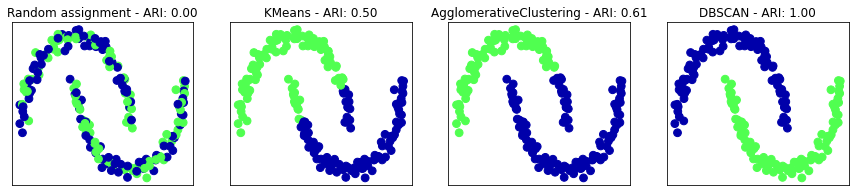

In [25]:
from sklearn.metrics.cluster import adjusted_rand_score
import matplotlib.pyplot as plt
X,y = make_moons(n_samples=200, noise=0.05, random_state=0)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
fig, axes = plt.subplots(1,4, figsize=(15,3), subplot_kw={'xticks':(),'yticks':()})
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]
random_state=np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0,high=2,size=len(X))
axes[0].scatter(X_scaled[:,0],X_scaled[:,1],c=random_clusters,cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(adjusted_rand_score(y,random_clusters)))
for ax, algorithm in zip(axes[1:],algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0],X_scaled[:,1],c=clusters,cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__, adjusted_rand_score(y,clusters)))

a common mistake when evaluating clustering in this way is to use accuracy_score instead of adjusted_rand_score, normalized_mutual_info_score, or some other clustering metric. The problem in using accuracy is that it requires the assigned cluster labels to exactly match the ground truth. However, the cluster labels themselves are meaningless- the only thing that matters is which points are in the same cluster.

In [26]:
from sklearn.metrics import accuracy_score
clusters1 = [0,0,1,1,0]
clusters2 = [1,1,0,0,1]
print("Accuracy: {:.2f}".format(accuracy_score(clusters1,clusters2)))
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1,clusters2)))

Accuracy: 0.00
ARI: 1.00


## evaluating clustering without ground truth

There are scoring metrics for clustering that don't require ground truth, like the silhouette coefficient. However, these often don't work well in practice. The silhouette score computes the compactness of a cluster, where higher is better, with a perfect score of 1. While compact clusters are good, compactness doesn't allow for complex shapes.

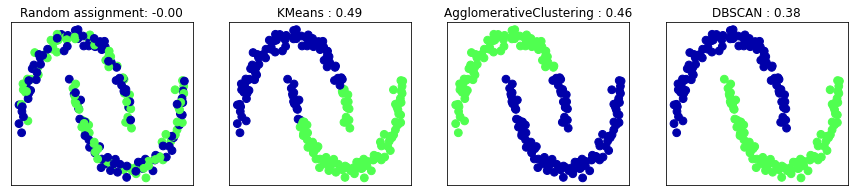

In [27]:
from sklearn.metrics.cluster import silhouette_score

X,y = make_moons(n_samples=200, noise=0.05, random_state=0)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
fig, axes = plt.subplots(1,4,figsize=(15,3), subplot_kw={'xticks':(),'yticks':()})
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0,high=2, size=len(X))
axes[0].scatter(X_scaled[:,0],X_scaled[:,1],c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(silhouette_score(X_scaled,random_clusters)))
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),DBSCAN()]
for ax, algorithm in zip(axes[1:],algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0],X_scaled[:,1],c=clusters,cmap=mglearn.cm3,s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,silhouette_score(X_scaled,clusters)))

# Comparing algorithms on the faces dataset

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True,random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

### applying DBSCAN

In [29]:
dbscan = DBSCAN()
labels= dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


In [30]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


In [31]:
dbscan = DBSCAN(min_samples = 3, eps = 15)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1  0]


In [32]:
print("Number of points per cluster: {}".format(np.bincount(labels+1)))

Number of points per cluster: [  32 2031]


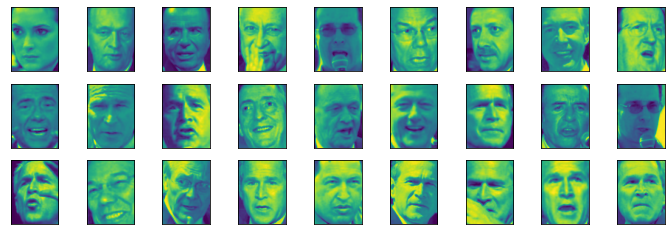

In [36]:
noise = X_people[labels==-1]
fig, axes = plt.subplots(3,9, subplot_kw={'xticks':(),'yticks':()},figsize=(12,4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape))

In [37]:
for eps in [1,3,5,7,9,11,13]:
    print("\neps={}".format(eps))
    dbscan = DBSCAN(eps = eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print("Number of clusters: {}".format(len(np.unique(labels))))
    print("Cluster sizes: {}".format(np.bincount(labels+1)))


eps=1
Number of clusters: 1
Cluster sizes: [2063]

eps=3
Number of clusters: 1
Cluster sizes: [2063]

eps=5
Number of clusters: 1
Cluster sizes: [2063]

eps=7
Number of clusters: 14
Cluster sizes: [2004    3   14    7    4    3    3    4    4    3    3    5    3    3]

eps=9
Number of clusters: 4
Cluster sizes: [1307  750    3    3]

eps=11
Number of clusters: 2
Cluster sizes: [ 413 1650]

eps=13
Number of clusters: 2
Cluster sizes: [ 120 1943]


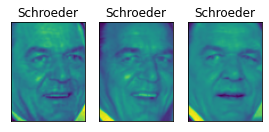

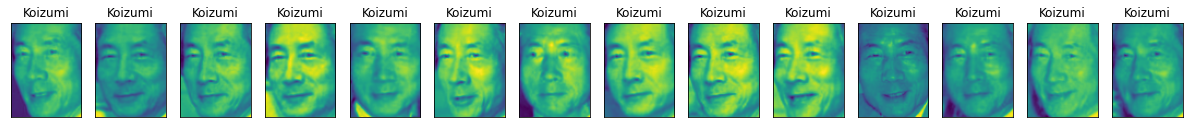

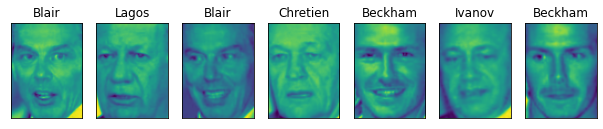

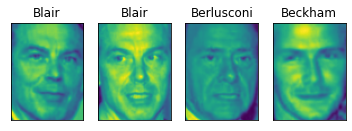

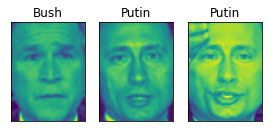

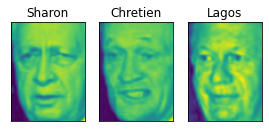

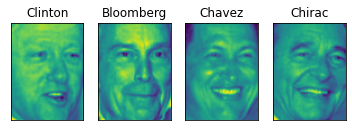

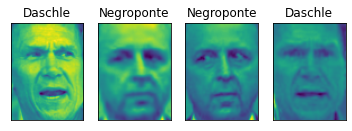

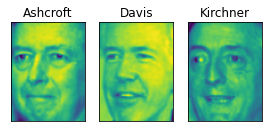

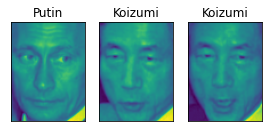

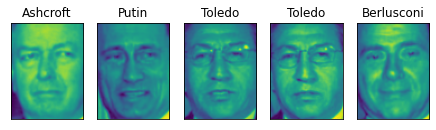

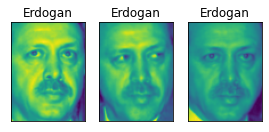

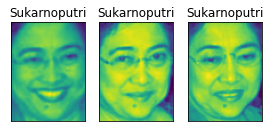

In [38]:
dbscan = DBSCAN(min_samples=3, eps = 7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels)+1):
    mask = labels == cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1,n_images, figsize=(n_images*1.5, 4), subplot_kw={'xticks':(),'yticks':()})
    for image, label , ax in zip(X_people[mask],y_people[mask],axes):
        ax.imshow(image.reshape(image_shape))
        ax.set_title(people.target_names[label].split()[-1])

## Analyzing face dataset with k-means.

In [39]:
km = KMeans(n_clusters=10,random_state=0)
labels_km = km.fit_predict(X_pca)
print("Cluster sizes k-means: {}".format(np.bincount(labels_km)))

Cluster sizes k-means: [155 175 238  75 358 257  91 219 323 172]


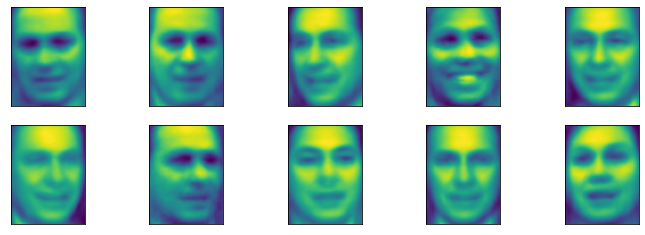

In [41]:
fig, axes = plt.subplots(2,5, subplot_kw={'xticks':(),'yticks':()}, figsize=(12,4))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape))

## analyzing the face dataset with agglomerative clustering.

In [43]:
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print("Cluster sizes agglomerative clustering : {}".format(np.bincount(labels_agg)))

Cluster sizes agglomerative clustering : [169 660 144 329 217  85  18 261  31 149]


In [44]:
print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg,labels_km)))

ARI: 0.09


Text(0, 0.5, 'Cluster distance')

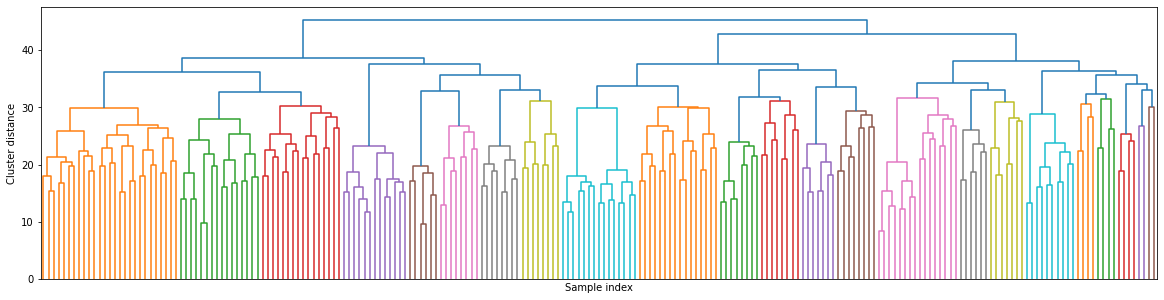

In [45]:
linkage_array = ward(X_pca)
plt.figure(figsize=(20,5))
dendrogram(linkage_array, p=7, truncate_mode='level',no_labels=True)
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

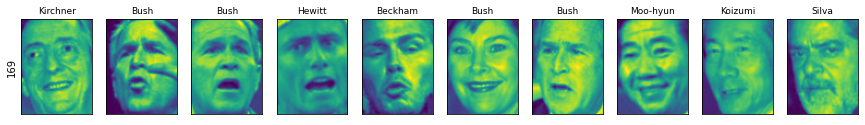

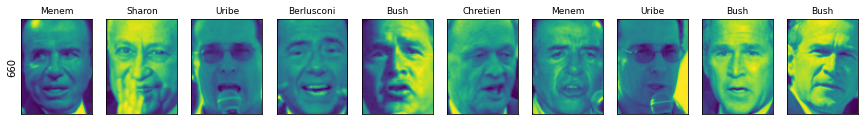

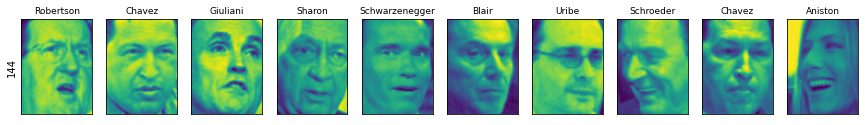

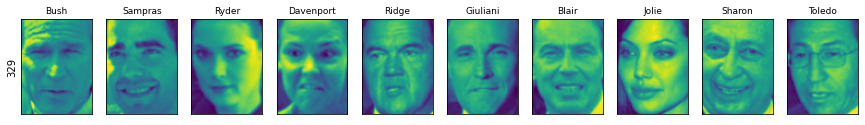

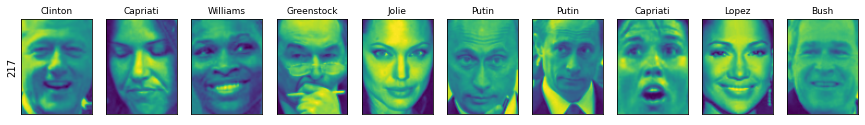

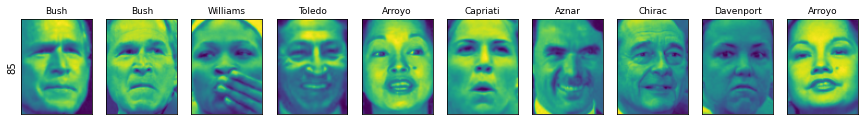

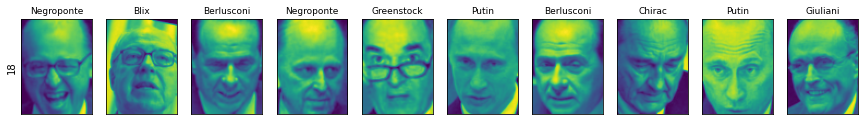

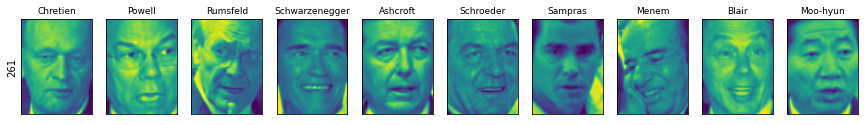

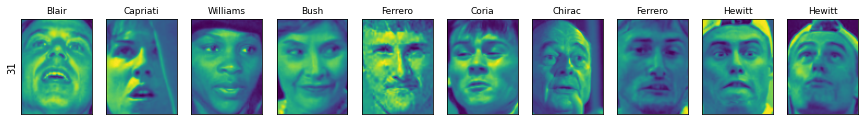

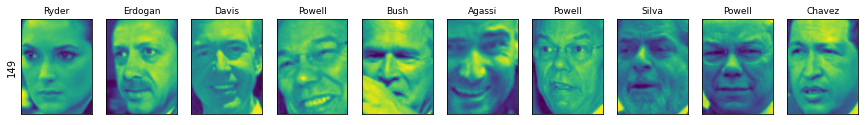

In [46]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg==cluster
    fig, axes = plt.subplots(1,10,subplot_kw={'xticks':(),'yticks':()},figsize=(15,8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask],y_people[mask],labels_agg[mask],axes):
        ax.imshow(image.reshape(image_shape))
        ax.set_title(people.target_names[label].split()[-1],fontdict={'fontsize':9})

Cluster sizes agglomerative clustering : [ 43 120 100 194  56  58 127  22   6  37  65  49  84  18 168  44  47  31
  78  30 166  20  57  14  11  29  23   5   8  84  67  30  57  16  22  12
  29   2  26   8]


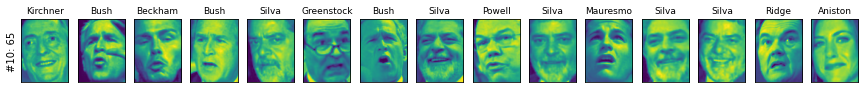

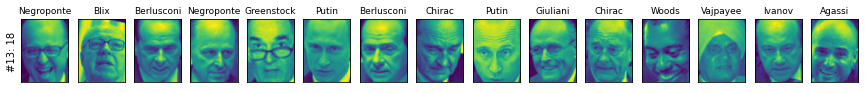

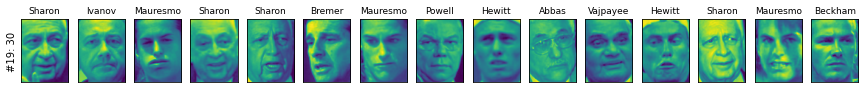

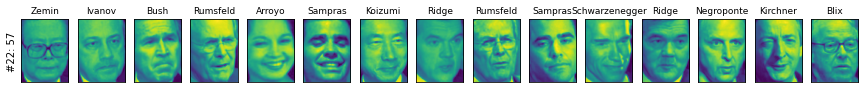

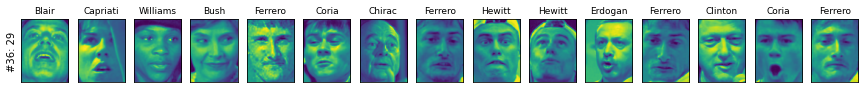

In [49]:
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print("Cluster sizes agglomerative clustering : {}".format(np.bincount(labels_agg)))
n_clusters = 40
for cluster in [10,13,19,22,36]:
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1,15, subplot_kw= {'xticks':(),'yticks':()},figsize=(15,8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask],y_people[mask],labels_agg[mask],axes):
        ax.imshow(image.reshape(image_shape))
        ax.set_title(people.target_names[label].split()[-1], fontdict={'fontsize':9})
    for i in range(cluster_size,15):
        axes[i].set_visible(False)